## Data Exploration and Preprocessing

**Importing all the Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

**Mount Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Pima Indians Diabetes Dataset Upload**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes

Link to the dataset: [Diabetes Dataset](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data)

In [ ]:

!pip install -q kaggle


!mkdir -p ~/.kaggle
!echo '{"username":"laithhannun","key":"27887219"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


DEST="/content/drive/MyDrive/pima_dataset"
!mkdir -p {DEST}


!kaggle datasets download -d uciml/pima-indians-diabetes-database -p {DEST}


!unzip -o {DEST}/pima-indians-diabetes-database.zip -d {DEST}


!ls {DEST}


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 1.05MB/s]
Archive:  /content/drive/MyDrive/pima_dataset/pima-indians-diabetes-database.zip
  inflating: /content/drive/MyDrive/pima_dataset/diabetes.csv  
diabetes.csv  pima-indians-diabetes-database.zip


**Store the Dataset**

The data includes the following features:

*   **Pregnancies:** Number of Pregnancies
*   **Glucose**: Plasma Glucose Concentration (mg/dL)
*   **BloodPressure**: Diastolic Blood Pressure (mm Hg)
*   **SkinThickness**: Triceps Skinfold Thickness
*   **Insulin**: 2-Hour Serum Insulin
*   **BMI**: Body Mass Index (kg/m^2)
*   **DiabetesPedigreeFunction**: Diabetes Risk Score
*   **Age**: Patient Age
*   **Outcome**: Diabetes Indicator












In [ ]:
df = pd.read_csv('/content/drive/MyDrive/pima_dataset/diabetes.csv')
SEED = 24869570

**Display the first ten samples**

In [ ]:
df.head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


**Data Types of the Features**

In [ ]:
print(df.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


**Display Zero Frequency Before Preprocessing**

Displays the number of zeros for each feature before the preprocessing phase

In [ ]:
(df == 0).sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,500


**Median Replacement**

Replaces the zeros with the median for the following features:

*   Glucose
*   BloodPressure
*   SkinThickness
*   Insulin
*   BMI

**Display Zero Frequency Before Preprocessing**

After Median Recplacement it displays the number of zeros for each feature








In [ ]:
columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in columns:
  median = df[col].loc[df[col] != 0].median()
  df[col] = df[col].replace(0, median)

(df == 0).sum()

,0
Pregnancies,111
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,500


**Display Correlation Matrix**

Displays the correlation matrix for each feature to check its alignment with the output.

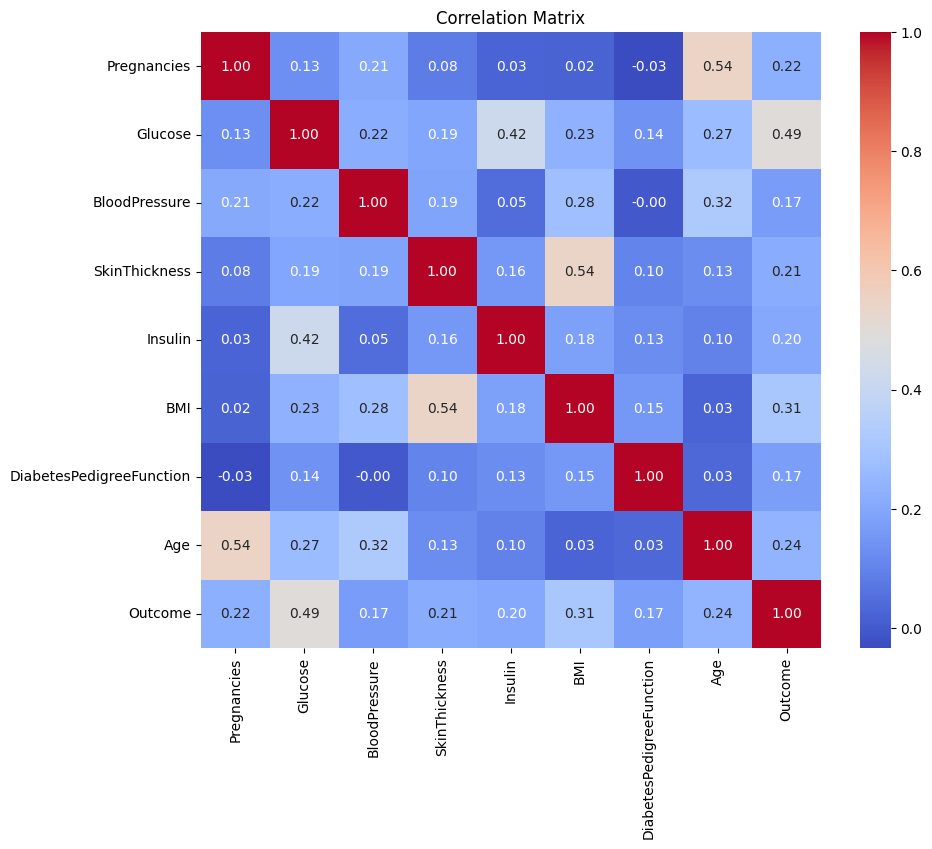

In [ ]:
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**Display Box Plot for Each Feature**

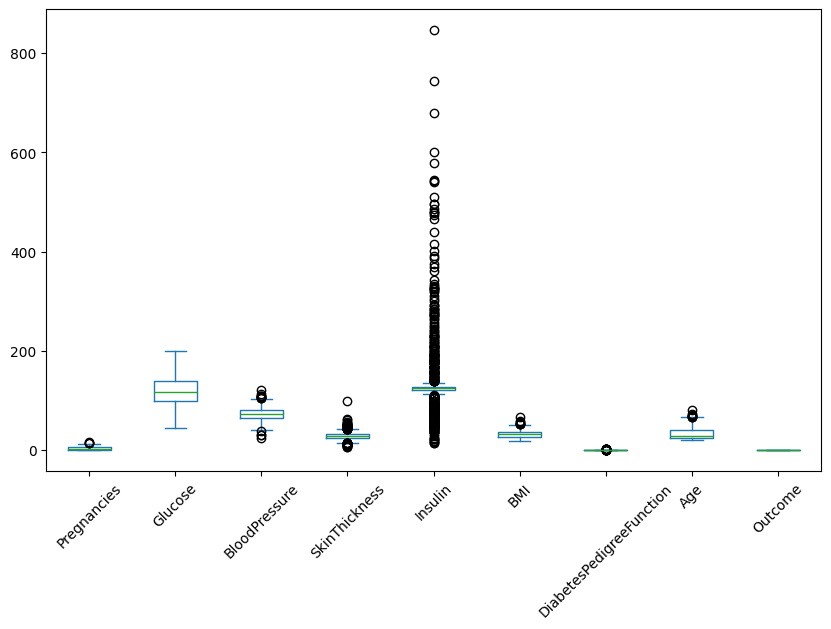

In [ ]:
df.select_dtypes(include=["number"]).plot(kind="box", figsize=(10, 6))
plt.xticks(rotation=45)
plt.show()


**Class Frequency**

Displays the class frequency for all the samples. Based on that the non-diabetic samples are more than the diabetic samples.

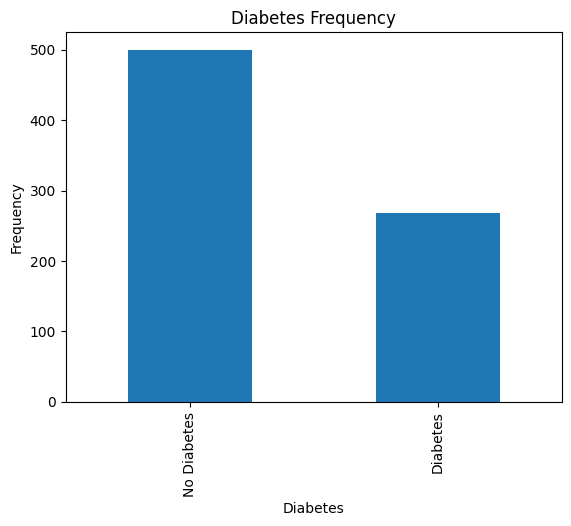

In [ ]:
outcome_counts = df["Outcome"].value_counts()
labels = ["No Diabetes", "Diabetes"]

outcome_counts.plot(kind='bar')
plt.xticks([0, 1], labels)
plt.xlabel('Diabetes')
plt.ylabel('Frequency')
plt.title('Diabetes Frequency')
plt.show()

**Data Splitting**

The following data split is 60/20/20 for train, validation, and testing set with my student ID as the random seed.

**Feature Selection Preprocessing**

After reviewing the correlation matrix, DiabetesPedigreeFunction, BloodPressure, SkinThickness, and Insulin were removed since they had the least correlation with the output.

**SMOTE Data Balancing**

In the training set, SMOTE was used to balance the classes that was previously shown to avoid bias.

In [ ]:
X = df.drop(columns=["DiabetesPedigreeFunction" , "BloodPressure", "SkinThickness" , "Insulin", "Outcome"]).astype("float32")
y = df["Outcome"].astype("float32")

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=SEED)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=SEED)

smote = SMOTE(random_state=SEED)
X_train, y_train = smote.fit_resample(X_train, y_train)

label = StandardScaler()
X_train = label.fit_transform(X_train).astype("float32")
X_val = label.transform(X_val).astype("float32")
X_test = label.transform(X_test).astype("float32")

**Class Balancement After SMOTE**

As shown the following class frquencies are now equal.

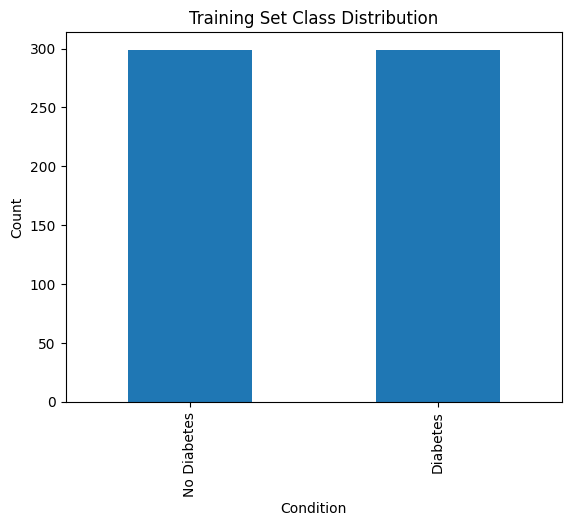

In [ ]:
y_train.value_counts().sort_index().plot(kind='bar')
plt.xticks([0, 1], ["No Diabetes", "Diabetes"])
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Training Set Class Distribution')


plt.show()



## Model Variants Training

**Model Vairants Parameters**

The following model variants are neural networks that contain many following parameters which includes the number of neurons, number of hidden layers, activation functions, Loss functions, Optimisers, and Dropout Layers.

---

**Activation Functions**

The activation function that is used for the hidden layers is **ReLU**.

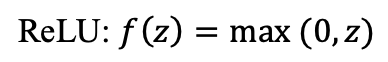

If the output number is a negative, it will be 0 by default, and if the output number is positive it remains the same.

for the output Layer the activation function used is **Sigmoid**.

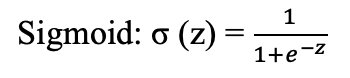

It calculates a probability that ranges between 0 and 1 where if it is less than or equal to 0.5 it is non-diabetic; however, if it is greater than 0.5 it is diabetic case.

---




**Binary Crossentropy Loss Function**

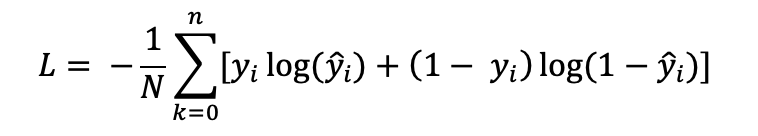

Binary Cross-Entropy is optimal for Binary Classification which aligns with the diabetes detection. It is used to measure how far it is from the target.

---

**Adam Optimiser**

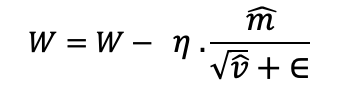

Optimisers are used to update the weights to reach closer to the target and improve the model which is part of the backward propogation. Adam Optimiser is chosen since not only it updates the weights, but also the learning rate which makes it better.

---

**Dropout Layers**

All the model variants use dropout layers to reduce overfitting by freezing layers.

**Model Variant 1 (32 Neurons, 1 Hidden Layer)**

Model Variant 1 consists of 32 Neurons, 1 Hidden Layer, and 0.5 Dropout Layer rate.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=32, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

**Display the Model Variant 1 Architecture**

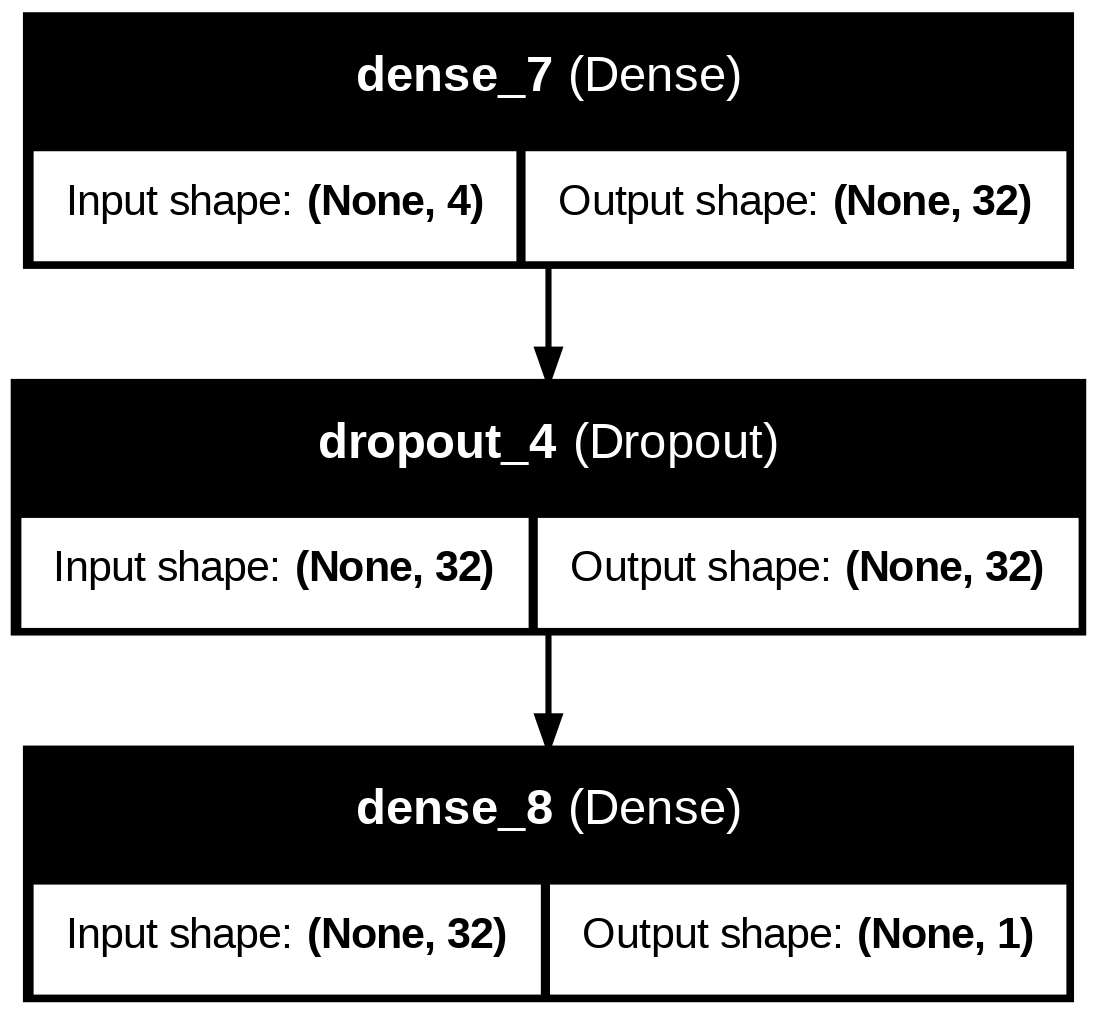

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="first-variant.png",
    show_shapes=True,
    show_layer_names=True,
    expand_nested=True,
    dpi=220
)

**Model Variant 2 (64 Neurons, 1 Hidden Layer)**

Model Variant 2 consists of 64 Neurons, 1 Hidden Layer, and 0.5 Dropout Layer rate.

In [ ]:
second_variant_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

second_variant_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
second_variant_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 385 (1.50 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 0 (0.00 B)

**Display the Model Variant 2 Architecture**

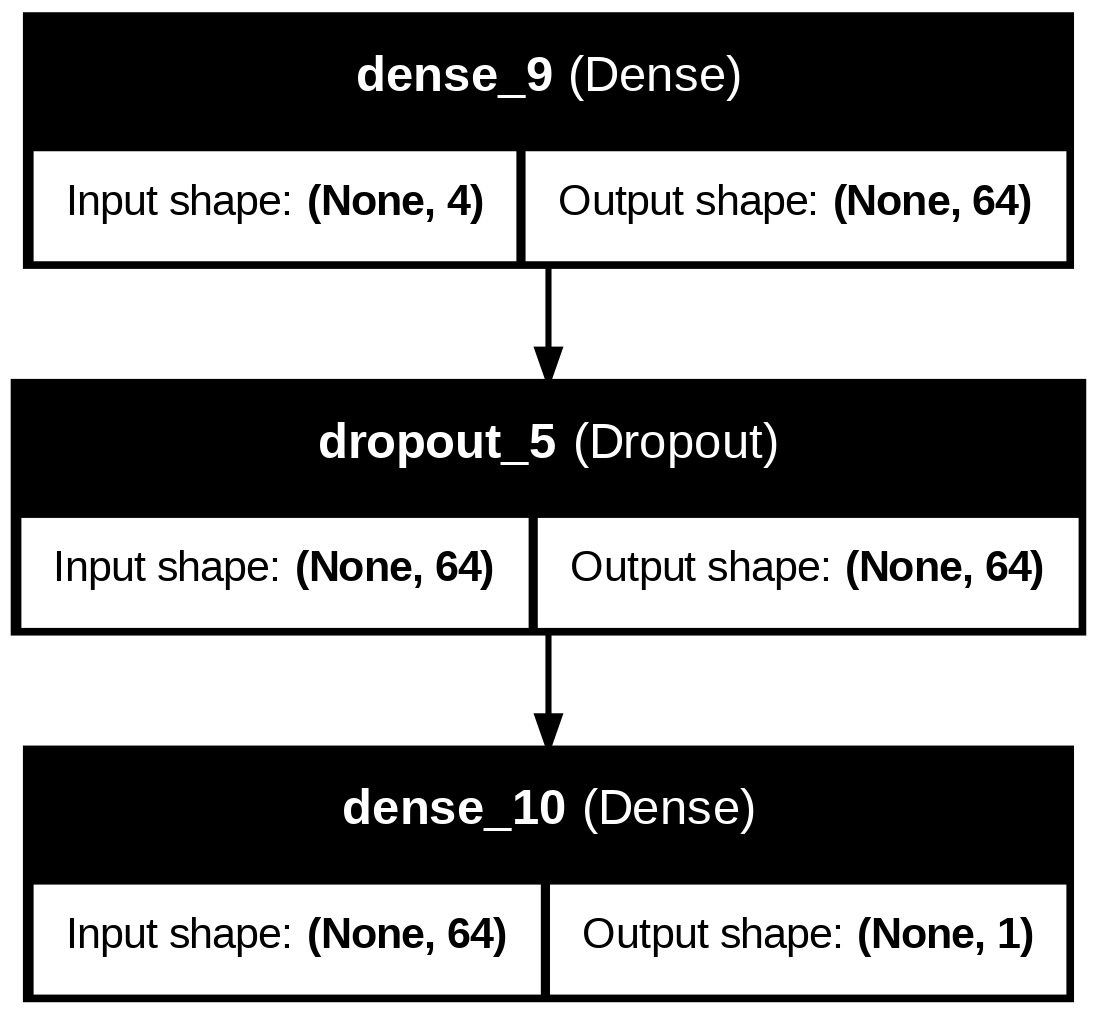

In [ ]:
tf.keras.utils.plot_model(
    second_variant_model,
    to_file="second-variant.png",
    show_shapes=True,
    show_layer_names=True,
    expand_nested=True,
    dpi=220
)

**Model Variant 3 (64 and 32 Neurons, 2 Hidden Layers)**

Model Variant 3 consists of (64 and 32 neurons), 2 Hidden Layers, and (0.5 and 0.3 Dropout Layers).

In [ ]:
third_variant_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

third_variant_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
third_variant_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

**Display the Model Variant 3 Architecture**

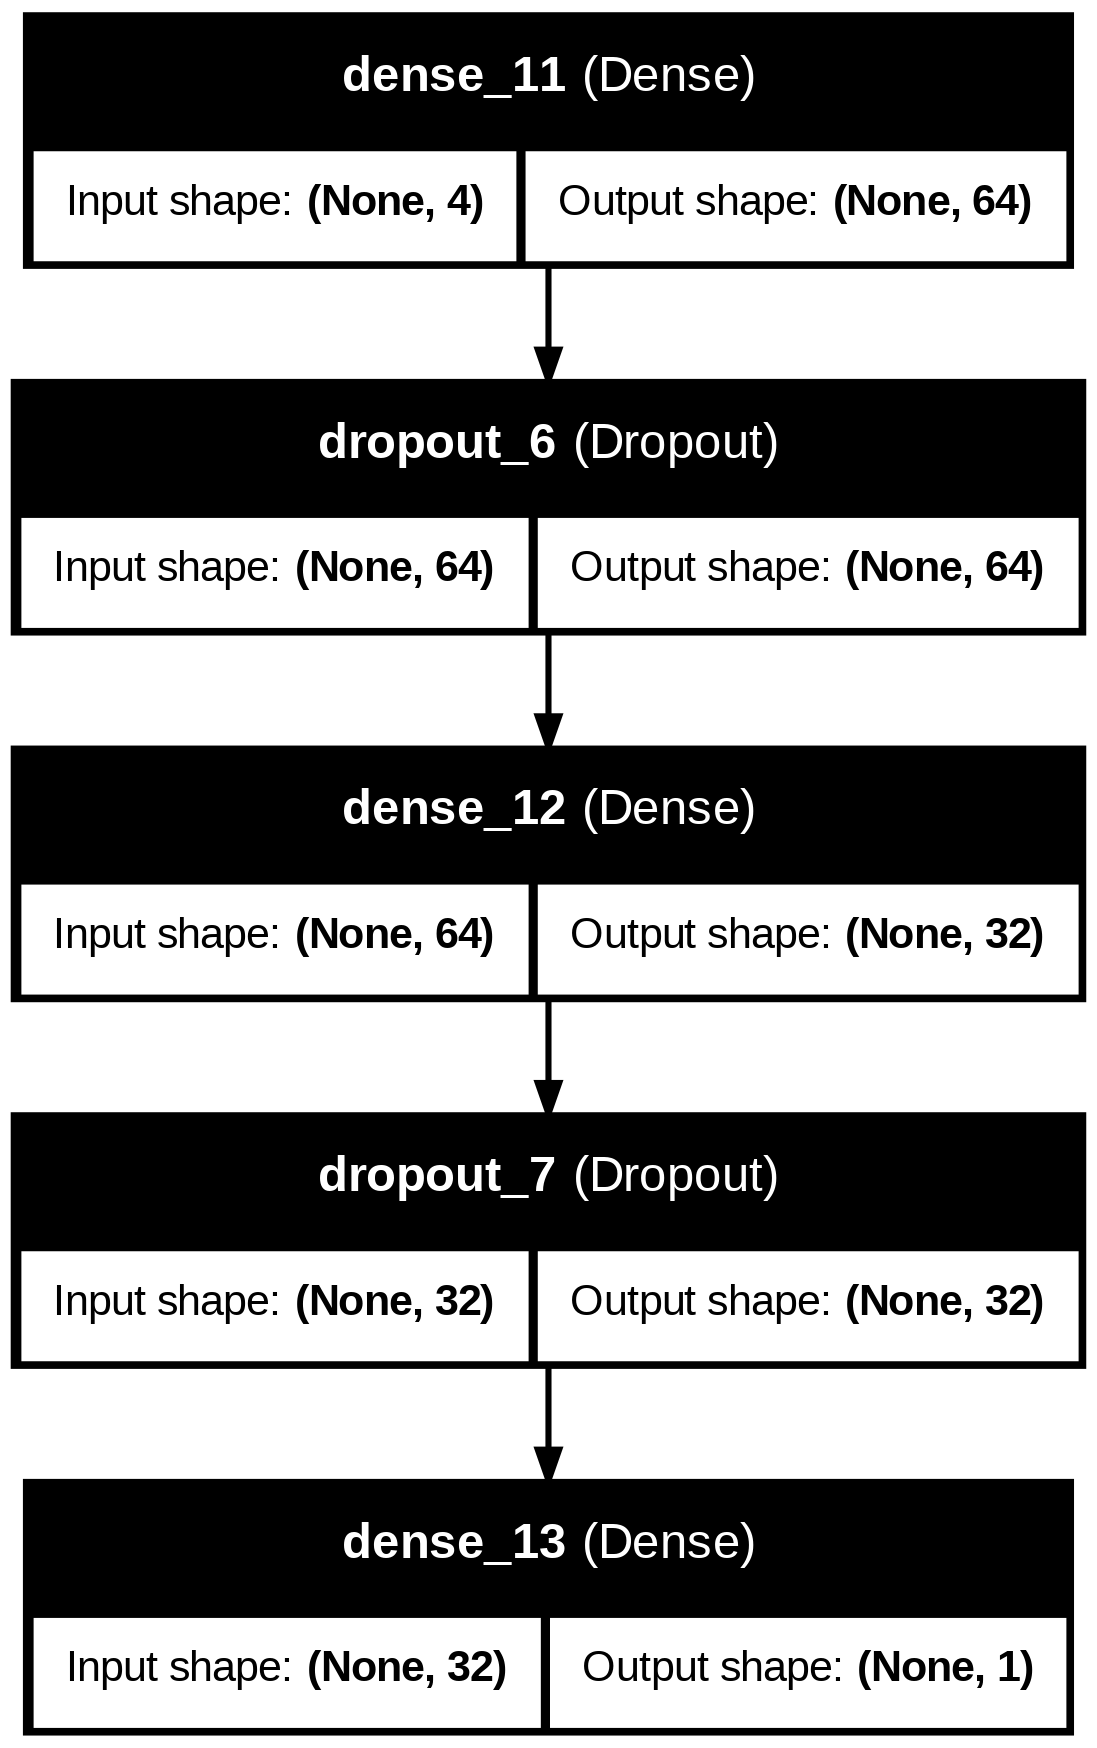

In [ ]:
tf.keras.utils.plot_model(
    third_variant_model,
    to_file="third-variant.png",
    show_shapes=True,
    show_layer_names=True,
    expand_nested=True,
    dpi=220
)

**Model Variant 1 Training Parameters**

Model Variant 1 parameters includes 200 epochs, early stoppage, and 16 batch size.

In [ ]:
early_stopping = EarlyStopping(
  monitor='val_loss',
  patience=20,
  restore_best_weights=True
)


In [ ]:
history = model.fit(
  X_train, y_train,
  validation_data=(X_val, y_val),
  callbacks=[early_stopping],
  epochs=200, batch_size=16, verbose=1
)

Epoch 1/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6333 - loss: 0.6433 - val_accuracy: 0.7078 - val_loss: 0.5929
Epoch 2/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6846 - loss: 0.5997 - val_accuracy: 0.7208 - val_loss: 0.5762
Epoch 3/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6838 - loss: 0.5683 - val_accuracy: 0.7273 - val_loss: 0.5722
Epoch 4/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7014 - loss: 0.5507 - val_accuracy: 0.7143 - val_loss: 0.5663
Epoch 5/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7556 - loss: 0.5137 - val_accuracy: 0.7143 - val_loss: 0.5637
Epoch 6/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7305 - loss: 0.5226 - val_accuracy: 0.7273 - val_loss: 0.5635
Epoch 7/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7227 - loss: 0.5394 - val_accuracy: 0.7208 - val_loss: 0.5584
Epoch 8/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7229 - loss: 0.5310 - val_accuracy: 0.7338 - v

**Model Variant 2 Training Parameters**

Model Variant 2 parameters includes 200 epochs, early stoppage, and 16 batch size.

In [ ]:
history_one = second_variant_model.fit(
  X_train, y_train,
  validation_data=(X_val, y_val),
  callbacks=[early_stopping],
  epochs=200, batch_size=16, verbose=1
)

Epoch 1/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5293 - loss: 0.6828 - val_accuracy: 0.7078 - val_loss: 0.6049
Epoch 2/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6903 - loss: 0.6018 - val_accuracy: 0.7143 - val_loss: 0.5783
Epoch 3/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7034 - loss: 0.5536 - val_accuracy: 0.7273 - val_loss: 0.5669
Epoch 4/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7427 - loss: 0.5403 - val_accuracy: 0.7143 - val_loss: 0.5633
Epoch 5/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7423 - loss: 0.5061 - val_accuracy: 0.7208 - val_loss: 0.5640
Epoch 6/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6963 - loss: 0.5406 - val_accuracy: 0.7208 - val_loss: 0.5678
Epoch 7/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7469 - loss: 0.5043 - val_accuracy: 0.7403 - val_loss: 0.5579
Epoch 8/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7281 - loss: 0.5066 - val_accuracy: 0.7468 - v

**Model Variant 3 Training Parameters**

Model Variant 3 parameters includes 200 epochs, early stoppage, and 16 batch size.

In [ ]:
history_two = third_variant_model.fit(
  X_train, y_train,
  validation_data=(X_val, y_val),
  callbacks=[early_stopping],
  epochs=200, batch_size=16, verbose=1
)

Epoch 1/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5132 - loss: 0.7135 - val_accuracy: 0.7403 - val_loss: 0.5624
Epoch 2/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6585 - loss: 0.5909 - val_accuracy: 0.7338 - val_loss: 0.5453
Epoch 3/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7158 - loss: 0.5625 - val_accuracy: 0.7403 - val_loss: 0.5411
Epoch 4/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7116 - loss: 0.5280 - val_accuracy: 0.7468 - val_loss: 0.5571
Epoch 5/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7367 - loss: 0.5299 - val_accuracy: 0.7468 - val_loss: 0.5632
Epoch 6/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7114 - loss: 0.5430 - val_accuracy: 0.7532 - val_loss: 0.5620
Epoch 7/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7070 - loss: 0.5316 - val_accuracy: 0.7468 - val_loss: 0.5663
Epoch 8/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7411 - loss: 0.5061 - val_accuracy: 0.7468 - v

## Model Variants Evaluation

**Model Evaluation Focus**

The three model variants were evaluated using the accuracy, recall, precision, and F1 metrics focusing more on the diabetic recall score to maximise the diabetic predictions.

**Model Variant 1 Training vs Validation loss and Accuracy Graphs**

Two graphs are shown which includes:

**Training vs Valdation Loss Curve**

Based on the loss values, it is showing a steady decrease across the epcohs, however, the validation loss converges and remains slightly higher than the training loss which indicates underfitting.

---

**Training vs Validation Accuracy Curve**

The validation accuracy is slightly higher than the training accuracy which indicates that the model variant 1 is learning. However, there is underfitting due to the simplicity of the model.


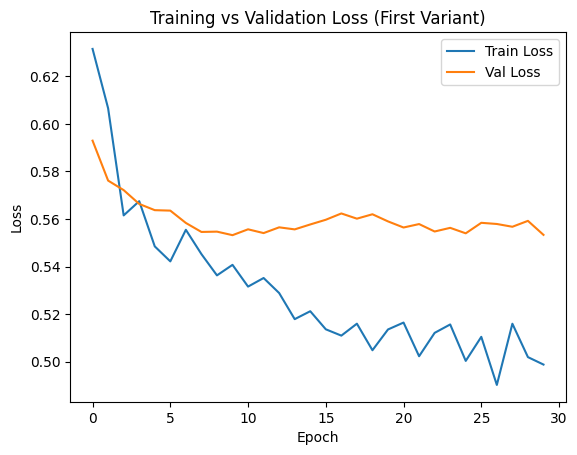

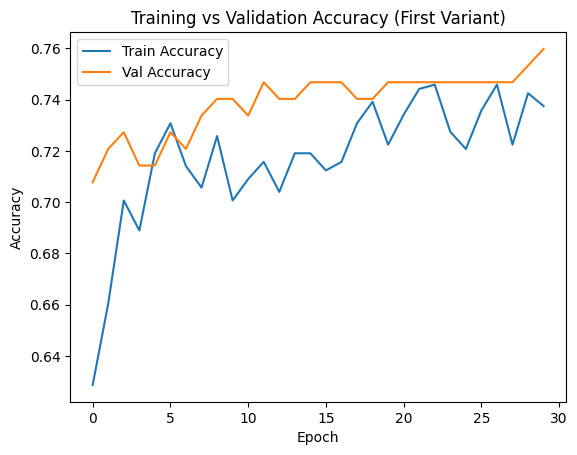

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss (First Variant)')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy (First Variant)')
plt.legend()
plt.show()


**Model Variant 2 Training vs Validation loss and Accuracy Graphs**

Two graphs are shown which includes:

**Training vs Valdation Loss Curve**

The training and validation loss decreased slightly. Moreover, the model variant 2 is fitting the data more effectively. There is no upward convergance which shows that there isn't overfitting.

---

**Training vs Validation Accuracy Curve**

The training and validation data accuracy improved on the model variant 2 compared to the others.

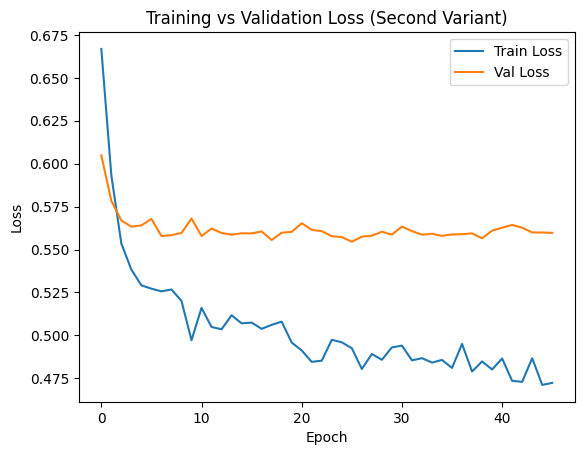

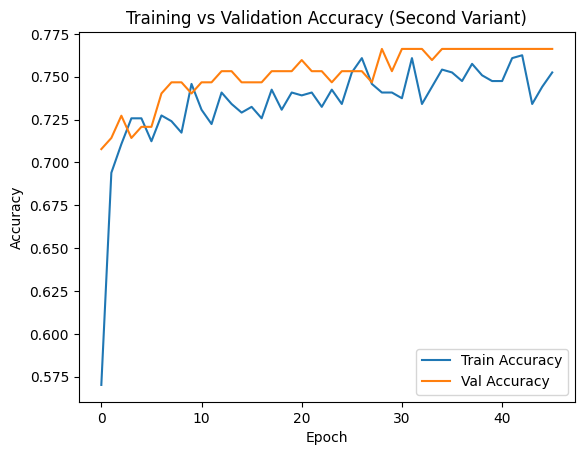

In [ ]:
plt.plot(history_one.history['loss'], label='Train Loss')
plt.plot(history_one.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss (Second Variant)')
plt.legend()
plt.show()

plt.plot(history_one.history['accuracy'], label='Train Accuracy')
plt.plot(history_one.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy (Second Variant)')
plt.legend()
plt.show()


**Model Variant 3 Training vs Validation loss and Accuracy Graphs**

Two graphs are shown which includes:

**Training vs Valdation Loss Curve**

The training loss decreases sharply, and the validation loss decreases; however, it becomes constant and starts to increase again at epoch 5 which indicates slight overfitting.

---

**Training vs Validation Accuracy Curve**

The validation accuracy is converging which means that it is focusing more on the training accuracy due to overfitting which results from the complexity of the model variant 3.

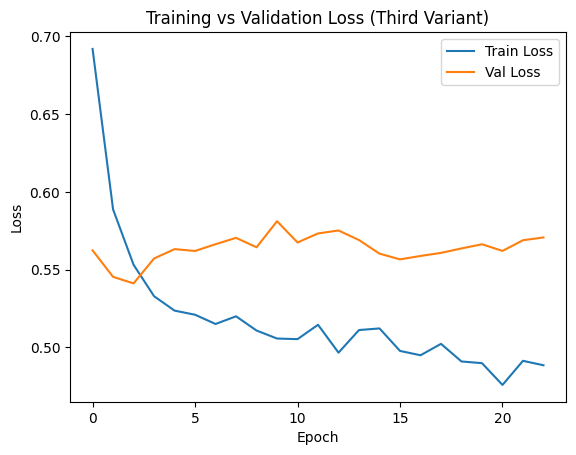

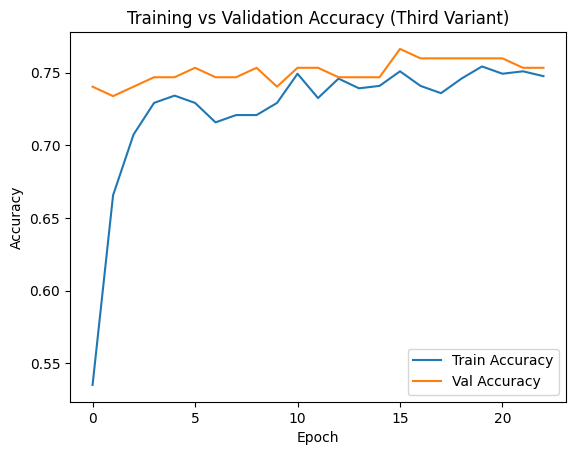

In [ ]:
plt.plot(history_two.history['loss'], label='Train Loss')
plt.plot(history_two.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss (Third Variant)')
plt.legend()
plt.show()

plt.plot(history_two.history['accuracy'], label='Train Accuracy')
plt.plot(history_two.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy (Third Variant)')
plt.legend()
plt.show()


**Accuracy Scores for Model Vairant 1**

This shows the training, validation, and testing accuracy scores for the model variant 1.

In [ ]:
train_acc = history.history['accuracy'][-1]
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"Train Accuracy:      {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Test Accuracy:       {test_acc:.4f}")


Train Accuracy:      0.7375
Validation Accuracy: 0.7403
Test Accuracy:       0.7792


**Accuracy Scores for Model Vairant 2**

This shows the training, validation, and testing accuracy scores for the model variant 2. Based on the results compared to the other model variants, it achieved the highest accuracy which shows that the model was learning.

In [ ]:
train_acc = history_one.history['accuracy'][-1]
val_loss, val_acc = second_variant_model.evaluate(X_val, y_val, verbose=0)
test_loss, test_acc = second_variant_model.evaluate(X_test, y_test, verbose=0)

print(f"Train Accuracy:      {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Test Accuracy:       {test_acc:.4f}")


Train Accuracy:      0.7525
Validation Accuracy: 0.7532
Test Accuracy:       0.8117


**Accuracy Scores for Model Vairant 3**

This shows the training, validation, and testing accuracy scores for the model variant 3. It was able to achieve higher accuracy compared to the model variant 1 in the testing set.

In [ ]:
train_acc = history_two.history['accuracy'][-1]
val_loss, val_acc = third_variant_model.evaluate(X_val, y_val, verbose=0)
test_loss, test_acc = third_variant_model.evaluate(X_test, y_test, verbose=0)

print(f"Train Accuracy:      {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Test Accuracy:       {test_acc:.4f}")


Train Accuracy:      0.7475
Validation Accuracy: 0.7403
Test Accuracy:       0.7857


**Confusion Matrix and Classification Report for Model Variant 1**

The False Negative values which is 13 indicates that the model vairant 1 is simple. Moreover, False Negative is nessecary for reduction to maximise the diabetic correct predictions that is indicated by its recall score. In addition, it showed the least precision score with a value of 0.66.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
              precision    recall  f1-score   support

         0.0       0.86      0.79      0.82       100
         1.0       0.66      0.76      0.71        54

    accuracy                           0.78       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.79      0.78      0.78       154



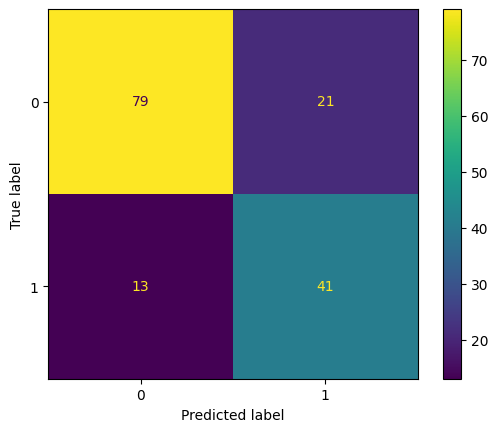

In [ ]:
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).ravel()
report = classification_report(y_test, y_pred)
print(report)


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

**Confusion Matrix and Classification Report for Model Variant 2**

Based on the confusion matrix for the model variant 2, it showed the least False Negative with a value of 13 which maximises the diabetic correct predictions more than the other model variants. This indicates that it has the highest recall score of 0.80 as shown in the classification report compared to the other model variants.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85       100
         1.0       0.70      0.80      0.75        54

    accuracy                           0.81       154
   macro avg       0.79      0.81      0.80       154
weighted avg       0.82      0.81      0.81       154



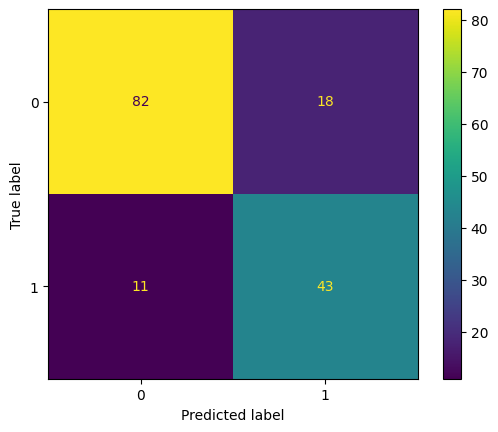

In [ ]:
y_pred_probs = second_variant_model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).ravel()
report = classification_report(y_test, y_pred)
print(report)


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

**Confusion Matrix and Classification Report for Model Variant 3**

Based on the confusion matrix for the model variant 3, it showed the highest False Negative with a value of 14 which minimises the diabetic correct predictions more than the other model variants. This indicates that it has the lowest recall score of 0.74 as shown in the classification report compared to the other model variants. This indicates that the model variant 3 does not align with our case were increasing the diabetic predictions is important.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83       100
         1.0       0.68      0.74      0.71        54

    accuracy                           0.79       154
   macro avg       0.77      0.78      0.77       154
weighted avg       0.79      0.79      0.79       154



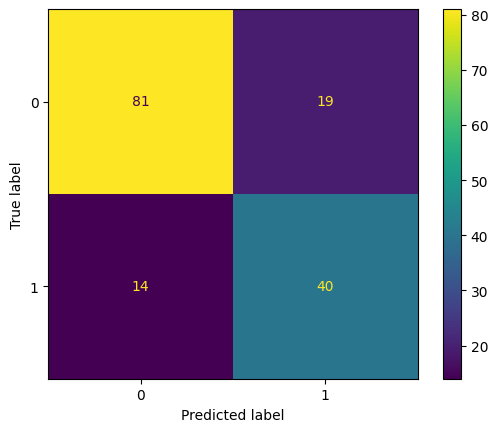

In [ ]:
y_pred_probs = third_variant_model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).ravel()
report = classification_report(y_test, y_pred)
print(report)


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()